# A Primer on Monte Carlo Methods
## Andrew Garcia, 2019

_Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at_

http://www.apache.org/licenses/LICENSE-2.0
_Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License._

### What are Monte Carlo methods?

Monte Carlo (MC) methods are, typically, computational algorithms which can be used to predict the parameters of a certain event or properties correlated thereof, which tend to relate on the likelihood of these event's occurence.

Thus, MC methods can indirectly predict a property of a feature which is correlated to a certain event, as is the popular example for estimating the value of $\pi$ from the random sampling of points from the area of a circle enclosed by a square (https://academo.org/demos/estimating-pi-monte-carlo/)

### Simple Monte Carlo: Estimating the standard deviation or spread of an independent variable

In the purest sense, MC methods involve sampling from random distributions. We can use python to specify which distribution to draw samples from, though one can also use a specific probability density function (PDFN) were python not able to have the specified PDFN available. 

This sampling can be done easily with python's **numpy.random** module. Obviously enough, were we to sample enough points from a random distribution, we would form said distribution:

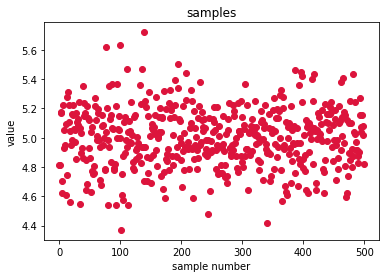

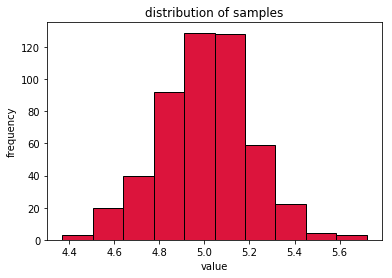

In [5]:
import random
import matplotlib.pyplot as plt

sampleno = 500
mean, sd = 5, 0.2 
k, x = 0, []
while k < sampleno: x.append(random.gauss(mean, sd)); k+=1

plt.figure()
plt.plot(x,'o',color='crimson'), plt.title('samples'), plt.xlabel('sample number'), plt.ylabel('value')
plt.figure()
plt.hist(x,color='crimson',edgecolor='k'), plt.title('distribution of samples'), plt.xlabel('value'), plt.ylabel('frequency')

plt.show()

Now, let's say for simplicity we studying a variable which we know is a linear combination of two dependent variables X1 and X2:

$Y = C_1 X_1 + C_2 X_2$

Here we assume the coefficients $C_i$ have already been determined. Let's continue with a real world example:

#### Monte Carlo Simulations for Six Sigma Process Control: Taffy Making Machine

Let's assume we have a taffy making machine and want to estimate the *'softness'* of our candy ($Y$) from the  amount of salt added ($X_1$) and the calender speed ($X_2$) . Knowing our machine, the calender speed is not completely steady; it oscillates exactly $\pm$ 10 speed units from its input. There is also some human error in how much salt is added per batch, and from such we have estimated a standard deviation. 

Nonetheless, we have also performed a fit and found the coefficients for X1 and X2 to appropriately correlate them with Y. Thus, our system is defined the following way: 

$Y = 0.6 X_1 + 1.4 X_2$

$Y$: Softness

$X_1$: Amount of salt - Gaussian distribution;  $\sigma_1$ = 3

$X_2$: Calender speed - Uniform distribution; $Range$ = [a,b]   ;   {a,b} = <$X_2$> $\pm$ 10  

With this information we can estimate the statistical distribution of our output, candy softness' with a simple MC algorithm:

1) A sample from $X_1$'s distribution is chosen <br/>
2) A sample from $X_2$'s distribution is chosen <br/>
3) These two samples are operated with the function for $Y$ above <br/>
4) 1-3 is repeated N times to form a distribution for $Y$ 

This can be easily automated with python adapting the previous script shown here:

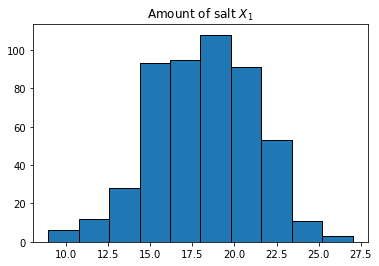

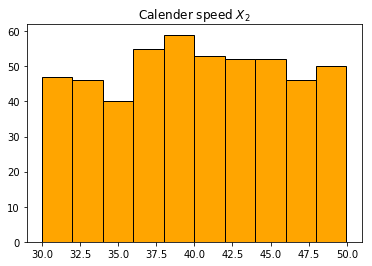

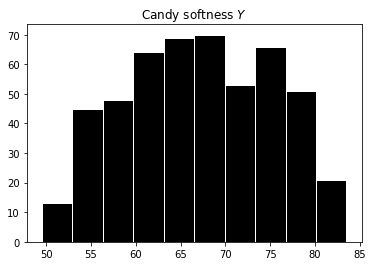

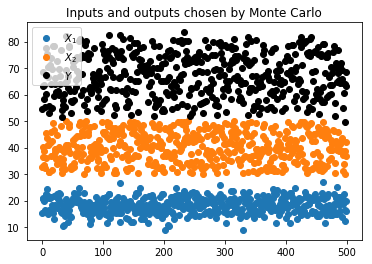

In [8]:
import numpy as np
def distgen(sampleno,dist_type,param1, param2):
    k, x = 0, []
    while k < sampleno: x.append(dist_type(param1,param2)); k+=1
    return np.array(x)

X1 = distgen(500,random.gauss,18, 3)
X2 = distgen(500,random.uniform,30, 50)

C1, C2 = 0.6,1.4
Y = C1*X1 + C2*X2

plt.title('Amount of salt $X_1$')
plt.hist(X1,edgecolor='k')
plt.show()
plt.title('Calender speed $X_2$')
plt.hist(X2,color='orange',edgecolor='k')
plt.show()
plt.title('Candy softness $Y$')
plt.hist(Y,color='k',edgecolor='w')
plt.show()
plt.title('Inputs and outputs chosen by Monte Carlo')
plt.plot(X1,'o',label='$X_1$'),plt.plot(X2,'o',label='$X_2$'),plt.plot(Y,'ko',label='$Y$'),plt.legend()
plt.show()


If we assume the distribution of $Y$ is Gaussian, then the center and spread parameters are simply normal mean and standard deviation, respectively, and can be calculated easily:

In [9]:
print('mean',np.mean(Y))
print('sdev',np.std(Y))

mean 67.12987623455005
sdev 8.06762450028008


Otherwise, we can then fit the $Y$ distribution to a probability density function (PDFN) and get the parameters thereof (e.g. mean, spread, kurtosis, etc..). We can load **pdsfit.py** from my **/statistics** repository to do so (see ***/statistics/pdsfit_tutorial*** to learn more) :


Candy softness
normal_mean 67.12987623455005
normal_sdev 8.06762450028008

Candy softness
lognorm_s/sigma 0.09996600150546583
lognorm_loc -13.44244418729117
lognorm_scale/median/exp_mean 80.08361975697517

Candy softness
beta_a 1.8936512878550635
beta_b 1.7549360908312828
beta_c 49.31128734976314
beta_d 34.3672568520559


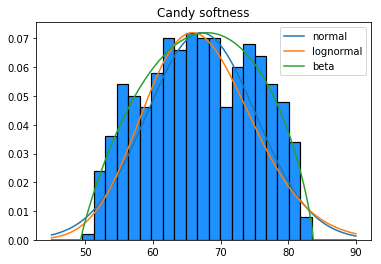

(['normal_mean',
  'normal_sdev',
  'lognorm_s/sigma',
  'lognorm_loc',
  'lognorm_scale/median/exp_mean',
  'beta_a',
  'beta_b',
  'beta_c',
  'beta_d'],
 [67.12987623455005,
  8.06762450028008,
  0.09996600150546583,
  -13.44244418729117,
  80.08361975697517,
  1.8936512878550635,
  1.7549360908312828,
  49.31128734976314,
  34.3672568520559])

In [10]:
from pdsfit import *
make(Y,'Candy softness',['gauss','lognorm','beta'],bins=20,xlims='')

One can see the mean and standard deviation obtained from numpy are the same as those obtained from a Gaussian fit of the generated $Y$ data.